<a href="https://colab.research.google.com/github/dineshsawantdba/MAERSK_Assignment/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-def55fde-e7e0-bb99-c4f6-235c82e4df47)


**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import io
import pandas as pd

**Upolad dataset**

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/fake_or_real_news.csv"

df = pd.read_csv(path)

In [4]:
df.sample(4)

,Unnamed: 0,title,text,label
1172,22,What do Americans really think about abortion?...,An anti-abortion protester stands with a sign ...,REAL
193,4577,President Trump: A colossal failure for democr...,It’s impossible to overstate how colossal a fu...,REAL
4533,7134,Wolf Richter: Layoffs at Alphabet Access to Hi...,"by Yves Smith \nBy Wolf Richter, a San Francis...",FAKE
1112,8527,Banana Republic Election in the United States?,Banana Republic Election in the United States?...,FAKE


**Combine title and text coulmns**

In [5]:
df['News'] = df['title'].str.cat(df['text'], sep =" ")

In [6]:
data = df[['News']]
data.tail()

,News
6330,State Department says it can't find emails fro...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se..."
6334,Jeb Bush Is Suddenly Attacking Trump. Here's W...


**Create function for text preprocessing**

In [7]:
def deconstructed(phrase):
  # Specific
  phrase = phrase.lower()
  phrase = re.sub(r"won't","will not",phrase)
  phrase = re.sub("can\'t","can not",phrase)
  #General
  phrase = re.sub(r"n\'t","not",phrase)
  phrase = re.sub(r"\'re","are",phrase)
  phrase = re.sub(r"\'s","is",phrase)
  phrase = re.sub(r"\'d","would",phrase)
  phrase = re.sub(r"\'ll","will",phrase)
  phrase = re.sub(r"\'ve","have",phrase)
  phrase = re.sub(r"\'m","am",phrase)
  phrase = re.sub('[^A-Za-z0-9]+',' ',phrase)
  phrase = re.sub('https?://\S+|www\.\S+','',phrase)
  phrase = phrase.replace('\\r',' ')
  phrase = phrase.replace('\\"',' ')
  phrase = phrase.replace('\\n',' ')

  return phrase


**Remove stopwords**

In [8]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not' , 'very'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', \
            's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren','won']

**Use text preprocessing function on our text data**

In [9]:
from tqdm import tqdm
cleaned_text = []
for sentence in tqdm(df['News'].values):
  sent = deconstructed(sentence)
  sent = ' '.join(e for e in sent.split() if e not in stopwords)
  cleaned_text.append(sent.strip())

100%|██████████| 6335/6335 [00:10<00:00, 599.39it/s]


In [10]:
df['cleaned_text'] = cleaned_text

**Use TF-IDF vectorizer**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
print("="*70)
print("Before vectorization : ")
print("-"*70)
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)
print("="*70)

vectorizer = TfidfVectorizer(min_df=10)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("="*70)
print("After vectorization : ")
print("-"*70)
print("Shape of X_train :",X_train_tfidf.shape)
print("Shape of X_test :",X_test_tfidf.shape)
print("="*70)

Before vectorization : 
----------------------------------------------------------------------
Shape of X_train : (4434,)
Shape of X_test : (1901,)
After vectorization : 
----------------------------------------------------------------------
Shape of X_train : (4434, 13605)
Shape of X_test : (1901, 13605)


**WordCloud representation for train data**

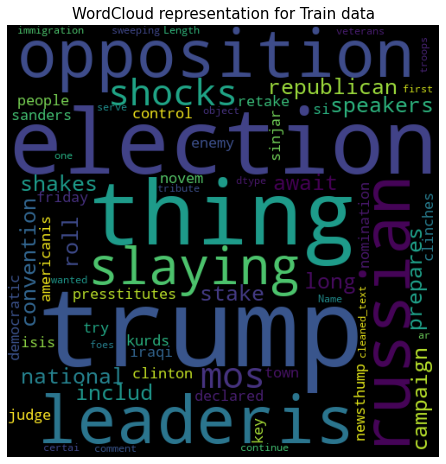

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=500,height=500,
                      background_color='black',
                      min_font_size=10).generate(str(X_train))
#Plot wordcloud image
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("WordCloud representation for Train data",fontsize=15)
plt.show()

Here we can see most frequent words from training dataset

**WordClod representation for test data**

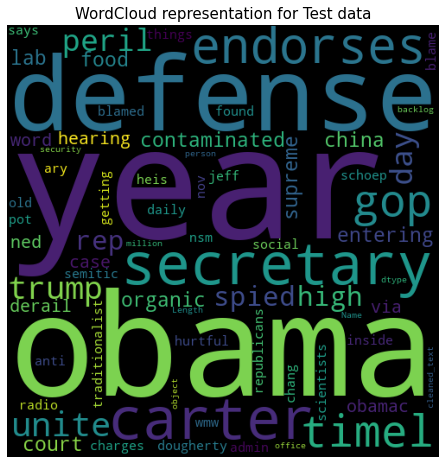

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=500,height=500,
                      background_color='black',
                      min_font_size=10).generate(str(X_test))
#Plot wordcloud image
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("WordCloud representation for Test data",fontsize=15)
plt.show()

**Label encoding for target column**

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [13]:
Target_labels = {'label' : ['REAL', 'FAKE'] , 'class' : [ 1,  0]}

In [14]:
Target_labels

{'class': [1, 0], 'label': ['REAL', 'FAKE']}

In [15]:
df.head()

,Unnamed: 0,title,text,label,News,cleaned_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear Daniel Greenfield...,smell hillary fear daniel greenfield shillman ...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan committed politic...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy U....,kerry go paris gesture sympathy u secretary st...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...,bernie supporters twitter erupt anger dnc trie...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...,battle new york primary matters itis primary d...


In [16]:
df_1 = df[['cleaned_text','label']]

In [17]:
df_1.head()

,cleaned_text,label
0,smell hillary fear daniel greenfield shillman ...,0
1,watch exact moment paul ryan committed politic...,0
2,kerry go paris gesture sympathy u secretary st...,1
3,bernie supporters twitter erupt anger dnc trie...,0
4,battle new york primary matters itis primary d...,1


**Logistic Regression**

In [18]:
X = df_1['cleaned_text']
y = df_1['label']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,3),max_features=30000)
X_train_tfidf = tf_idf_vect.fit_transform(X_train)

print("Some sample features(Unique words in the corpus)",tf_idf_vect.get_feature_names()[:20])
print("="*100)
#X_train_tfidf = tf_idf_vect.transform(X_train)
X_test_tfidf = tf_idf_vect.transform(X_test)
print("Type of count vectorizer",type(tf_idf_vect))
print("Shape of TFIDF count vectorizer for train data:",X_train_tfidf.get_shape())
print("Shape of TFIDF count vectorizer for test data:",X_test_tfidf.get_shape())
print("Number of unique words including both unigrams and bigrams",X_train_tfidf.get_shape()[1])

Some sample features(Unique words in the corpus) ['00', '000', '000 000', '000 american', '000 americans', '000 campaign', '000 children', '000 clinton', '000 emails', '000 feet', '000 jobs', '000 miles', '000 new', '000 pages', '000 people', '000 per', '000 per year', '000 refugees', '000 syrian', '000 troops']
Type of count vectorizer <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
Shape of TFIDF count vectorizer for train data: (4434, 30000)
Shape of TFIDF count vectorizer for test data: (1901, 30000)
Number of unique words including both unigrams and bigrams 30000


In [23]:
tf_idf_features = tf_idf_vect.get_feature_names()
tf_idf_features

['00',
 '000',
 '000 000',
 '000 american',
 '000 americans',
 '000 campaign',
 '000 children',
 '000 clinton',
 '000 emails',
 '000 feet',
 '000 jobs',
 '000 miles',
 '000 new',
 '000 pages',
 '000 people',
 '000 per',
 '000 per year',
 '000 refugees',
 '000 syrian',
 '000 troops',
 '000 votes',
 '000 year',
 '000 years',
 '01',
 '02',
 '02 2016',
 '03',
 '03 2016',
 '04',
 '05',
 '06',
 '07',
 '07 2016',
 '08',
 '09',
 '10',
 '10 000',
 '10 000 people',
 '10 11',
 '10 15',
 '10 16',
 '10 20',
 '10 2016',
 '10 27',
 '10 30',
 '10 31',
 '10 americans',
 '10 billion',
 '10 brainforce',
 '10 brainforce 25',
 '10 days',
 '10 million',
 '10 minutes',
 '10 months',
 '10 percent',
 '10 point',
 '10 points',
 '10 republicans',
 '10 say',
 '10 times',
 '10 year',
 '10 year old',
 '10 years',
 '10 years ago',
 '100',
 '100 000',
 '100 billion',
 '100 days',
 '100 million',
 '100 percent',
 '100 years',
 '1000',
 '101',
 '104',
 '105',
 '10th',
 '11',
 '11 000',
 '11 02',
 '11 03',
 '11 03 2016'

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.3s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   15.4s finished


<Figure size 432x288 with 0 Axes>

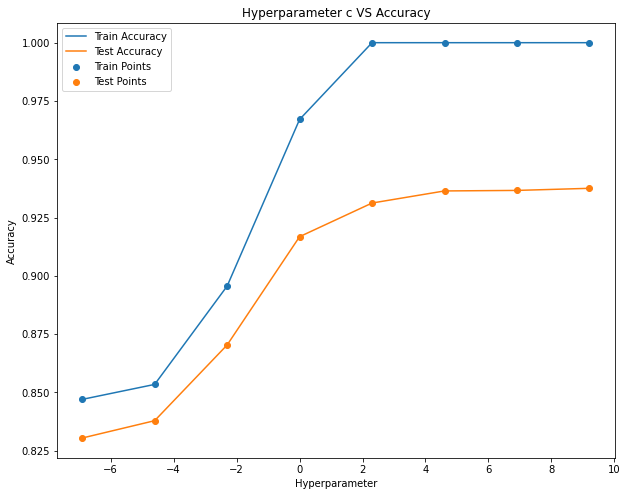

best_hyperparameter : {'C': 10000}


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import math
import matplotlib.pyplot as plt

classifier_LR = LogisticRegression(class_weight='balanced')

param_LR = {'C' : [0.001,0.01,0.1,1,10,100,1000,10000]}

clf = GridSearchCV(classifier_LR,param_LR,cv=3,scoring='accuracy',return_train_score=True,verbose=2)

clf.fit(X_train_tfidf,y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)

train_accuracy = results['mean_train_score']
cv_accuracy = results['mean_test_score']
hyperparameter = results['param_C']

log_c_LR = []
for i in hyperparameter:
    x = math.log(i)
    log_c_LR.append(x)

plt.figure()
plt.figure(figsize=(10,8))
plt.plot(log_c_LR,train_accuracy,label="Train Accuracy")
plt.plot(log_c_LR,cv_accuracy,label="Test Accuracy")
plt.scatter(log_c_LR,train_accuracy,label="Train Points")
plt.scatter(log_c_LR,cv_accuracy,label="Test Points")
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyperparameter c VS Accuracy")
plt.show()

best_hyperparameter = clf.best_params_
print("="*100)
print("best_hyperparameter :",best_hyperparameter)
print("="*100)


In [25]:
classifier_LR = LogisticRegression(C=1000,class_weight='balanced')
classifier_LR.fit(X_train_tfidf,y_train)
y_pred = classifier_LR.predict(X_test_tfidf)
confusion = confusion_matrix(y_test,y_pred)

print("Confusion matrix \n")
print(confusion)

print("Classification Report \n")
print(classification_report(y_test,y_pred,target_names=['REAL', 'FAKE']))

Confusion matrix 

[[905  44]
 [ 51 901]]
Classification Report 

              precision    recall  f1-score   support

        REAL       0.95      0.95      0.95       949
        FAKE       0.95      0.95      0.95       952

    accuracy                           0.95      1901
   macro avg       0.95      0.95      0.95      1901
weighted avg       0.95      0.95      0.95      1901



Using Logistic Regression, getting 95% acccuracy

**Naive Bayes**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import math
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

classifier_NB = MultinomialNB()

classifier_NB.fit(X_train_tfidf,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier_NB = MultinomialNB()
from sklearn.metrics import log_loss
classifier_NB.fit(X_train_tfidf,y_train)
y_pred = classifier_NB.predict(X_test_tfidf)

print("Log Loss : ")
print(log_loss(y_test,y_pred))
print('------------------------------')
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print('------------------------------')
print("classification report:")
print(classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

Log Loss : 
2.8707115318713896
------------------------------
confusion matrix:
[[829 120]
 [ 38 914]]
------------------------------
classification report:
              precision    recall  f1-score   support

    Positive       0.96      0.87      0.91       949
    Negative       0.88      0.96      0.92       952

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901



Using Naive bayes algorithm, we are getting 92% accuracy

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleaned_text  6335 non-null   object
 1   label         6335 non-null   object
dtypes: object(2)
memory usage: 99.1+ KB


**BERT**

In [27]:
df1 = df_1[['cleaned_text','label']].sample(1000)
df1.head()

,cleaned_text,label
3269,britain gunless bobbies provide answers americ...,REAL
5783,john boehneris parting gift paul ryan top dems...,REAL
426,momentum bar syrian refugees slows notable nam...,REAL
1718,comment wikileaks shocker clinton camp conside...,FAKE
537,yes clinton double standard anyone writing sen...,REAL


**Analysing average length for news**

In [28]:
seq_length = df_1['cleaned_text'].apply(lambda x :len(x.split()))

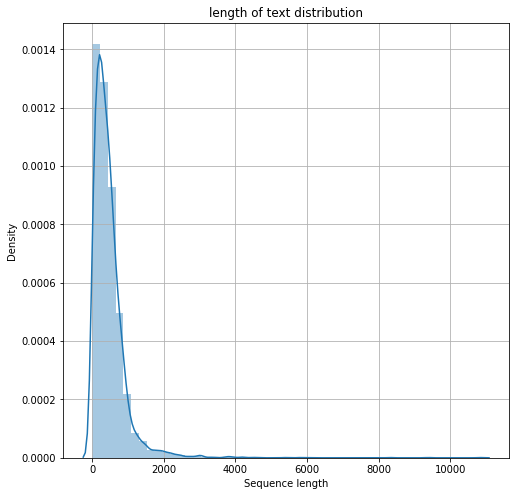

In [29]:
plt.figure(figsize=(8,8))
sns.distplot(seq_length,kde='True')
plt.title("length of text distribution")
plt.xlabel("Sequence length")
plt.grid()
plt.show()

Normal length for news means our each data point is around 2000 words

In [30]:
SEQ_LEN = 256

In [31]:
!pip install transformers

In [32]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [33]:
def tokenize(sentence):
  tokens = tokenizer.encode_plus(sentence,max_length=256,
                                 truncation=True,padding='max_length',
                                 add_special_tokens=True,
                                 return_token_type_ids=False,
                                 return_tensors='tf')
  return tokens['input_ids'] , tokens['attention_mask']

In [34]:
Xids = np.zeros((len(df1),256))
Xmask = np.zeros((len(df1),256))

In [35]:
print("="*50)
print("shape of X_ids:",Xids.shape)
print("-"*50)
print("shape of X_mask:",Xids.shape)
print("="*50)

shape of X_ids: (1000, 256)
--------------------------------------------------
shape of X_mask: (1000, 256)


In [36]:
for i , sequence in enumerate(df1['cleaned_text']):
  tokens = tokenize(sequence)
  Xids[i , :] , Xmask[i, :] = tokens[0] , tokens[1]

In [37]:
labels = df1['label'].values

In [38]:
labels = pd.get_dummies(df1['label'])
print(labels.head())

      FAKE  REAL
3269     0     1
5783     0     1
426      0     1
1718     1     0
537      0     1


In [40]:
labels=labels.values

In [41]:
type(labels)

numpy.ndarray

In [42]:
labels

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [43]:
import tensorflow as tf
data = tf.data.Dataset.from_tensor_slices((Xids,Xmask,labels))

In [44]:
data

<TensorSliceDataset shapes: ((256,), (256,), (2,)), types: (tf.float64, tf.float64, tf.uint8)>

In [45]:
SHUFFLE = 100000
#BATCH_SIZE = 32
BATCH_SIZE = 16

In [46]:
def map_func(input_ids,masks,labels):
  return {'input_ids':input_ids,'attention_mask':masks},labels

In [47]:
data = data.map(map_func)

In [48]:
data = data.shuffle(SHUFFLE).batch(BATCH_SIZE)

In [49]:
SIZE = Xids.shape[0]/BATCH_SIZE
SIZE

62.5

In [50]:
SPLIT = 0.9

train = data.take(int(SIZE*SPLIT))
val = data.skip(int(SIZE*SPLIT))

In [51]:
from transformers import TFAutoModel

In [52]:
bert = TFAutoModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [53]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
Total params: 109,482,240
Trainable params: 109,482,240
Non-trainable params: 0
_________________________________________________________________


In [54]:
input_ids = tf.keras.layers.Input(shape=(256,),name='input_ids',dtype='int32')
mask = tf.keras.layers.Input(shape=(256,),name='attention_mask',dtype='int32')

embeddings = bert.bert(input_ids,attention_mask=mask)[0] #we access the transformer model within our bert object using the bert attribute (eg bert.bert instead of bert)

x = tf.keras.layers.Dropout(0.4)(embeddings)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(768))(x)
y = tf.keras.layers.Dense(2,activation='sigmoid',name='outputs')(x)

model = tf.keras.Model(inputs = [input_ids,mask],outputs=y)

model.layers[2].trainable= False

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


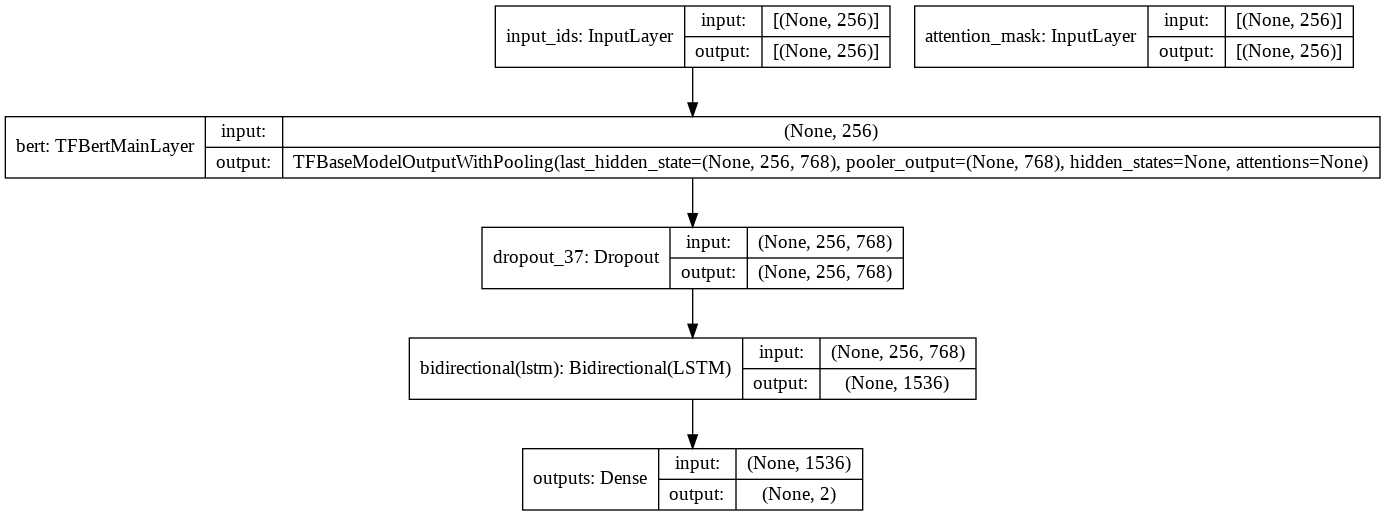

In [55]:
#Summarize the model
from tensorflow.keras.utils import plot_model
plot_model(model,'model_1.png',show_shapes=True)

In [56]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 256)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 256)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_37 (Dropout)            (None, 256, 768)     0           bert[0][0]                   

In [57]:
optimizer = tf.keras.optimizers.Adam(lr=0.001,decay=1e-6)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer,loss=loss,metrics=[acc])

In [58]:
tf.config.run_functions_eagerly(True)

In [59]:
history = model.fit(train,
                    validation_data=val,
                    epochs=10)

Epoch 1/10
56/56 [==============================] - 65s 1s/step - loss: 0.6215 - accuracy: 0.7210 - val_loss: 0.2357 - val_accuracy: 0.9038
Epoch 2/10
56/56 [==============================] - 63s 1s/step - loss: 0.3675 - accuracy: 0.8382 - val_loss: 0.3564 - val_accuracy: 0.8269
Epoch 3/10
56/56 [==============================] - 62s 1s/step - loss: 0.3138 - accuracy: 0.8661 - val_loss: 0.1705 - val_accuracy: 0.9327
Epoch 4/10
56/56 [==============================] - 62s 1s/step - loss: 0.2076 - accuracy: 0.9219 - val_loss: 0.0896 - val_accuracy: 0.9808
Epoch 5/10
56/56 [==============================] - 62s 1s/step - loss: 0.2107 - accuracy: 0.9196 - val_loss: 0.0917 - val_accuracy: 0.9519
Epoch 6/10
56/56 [==============================] - 63s 1s/step - loss: 0.1605 - accuracy: 0.9230 - val_loss: 0.0508 - val_accuracy: 0.9904
Epoch 7/10
56/56 [==============================] - 63s 1s/step - loss: 0.1331 - accuracy: 0.9453 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 8/10
56/56 [==

In [61]:
bert_history = pd.DataFrame(history.history)

In [62]:
bert_history

,loss,accuracy,val_loss,val_accuracy
0,0.621467,0.720982,0.235651,0.903846
1,0.367511,0.838170,0.356404,0.826923
2,0.313828,0.866071,0.170477,0.932692
3,0.207595,0.921875,0.089611,0.980769
4,0.210701,0.919643,0.091747,0.951923
5,0.160549,0.922991,0.050811,0.990385
6,0.133072,0.945312,0.031881,1.000000
7,0.116027,0.960938,0.015330,1.000000
8,0.097780,0.964286,0.041626,0.980769
9,0.133201,0.958705,0.025901,1.000000


In [63]:
bert_history.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [64]:
bert_history = bert_history[['accuracy','val_accuracy']]

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

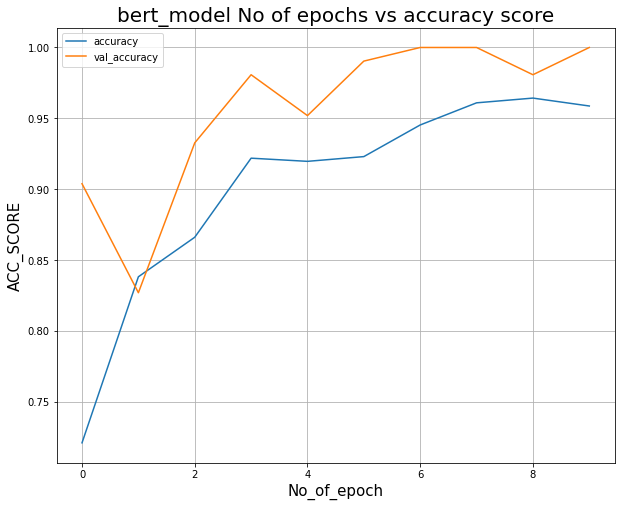

In [66]:
plt.figure()
ax=bert_history.plot(figsize=(10,8))
ax.set_ylabel('ACC_SCORE',fontsize=15)
ax.set_xlabel('No_of_epoch',fontsize=15)
ax.set_title('bert_model No of epochs vs accuracy score',fontsize=20)
plt.grid()

In [67]:
loss ,acc = model.evaluate(val)

7/7 [==============================] - 2s 332ms/step - loss: 0.0380 - accuracy: 1.0000


In [68]:
print("="*80)
print("Loss for bert with custom layer on validation dataset: ",loss)
print("-"*80)
print("Accuracy for bert with custom layer on validation dataset: ",acc)
print("="*80)

Loss for bert with custom layer on validation dataset:  0.03797278553247452
--------------------------------------------------------------------------------
Accuracy for bert with custom layer on validation dataset:  1.0


In [69]:
y_pred_bert = model.predict(val)

In [70]:
y_pred_bert

array([[0.15940383, 0.8344355 ],
       [0.03471953, 0.95320725],
       [0.9326038 , 0.07236854],
       [0.9458102 , 0.06940205],
       [0.9856111 , 0.01454523],
       [0.9501133 , 0.06302358],
       [0.14720064, 0.82696116],
       [0.06004765, 0.9307932 ],
       [0.174628  , 0.80678535],
       [0.9646317 , 0.04019828],
       [0.89153916, 0.12284926],
       [0.03580913, 0.95733315],
       [0.1113892 , 0.86720216],
       [0.9445803 , 0.07671159],
       [0.9771204 , 0.0311174 ],
       [0.16601515, 0.7813487 ],
       [0.98334527, 0.02057673],
       [0.9526215 , 0.07282934],
       [0.98460555, 0.02100022],
       [0.08250376, 0.88277537],
       [0.259969  , 0.7294735 ],
       [0.9426963 , 0.07814385],
       [0.01676786, 0.9706799 ],
       [0.97397214, 0.0375527 ],
       [0.99117786, 0.01273344],
       [0.96520555, 0.04941897],
       [0.99256563, 0.00967942],
       [0.00366918, 0.9932842 ],
       [0.02615173, 0.9671971 ],
       [0.04121438, 0.94856286],
       [0.

In [30]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Sr No" ,"Problem type ", "Model", "Test Accuracy"]
x.add_row(["1", "Binary classification\n ", 
           "Naive Bayes", '91%'])
x.add_row(["2", "Binary classification\n ", 
           "Logistic Regression", '95%'])
x.add_row(["3", "Binary classification\n ", 
           "Bert(pretrained hugging face)\n With Custom layers 1000 Datapoints ", 
           '100%'])

print(x)

+-------+-----------------------+--------------------------------------+---------------+
| Sr No |     Problem type      |                Model                 | Test Accuracy |
+-------+-----------------------+--------------------------------------+---------------+
|   1   | Binary classification |             Naive Bayes              |      91%      |
|       |                       |                                      |               |
|   2   | Binary classification |         Logistic Regression          |      95%      |
|       |                       |                                      |               |
|   3   | Binary classification |    Bert(pretrained hugging face)     |      100%     |
|       |                       |  With Custom layers 1000 Datapoints  |               |
+-------+-----------------------+--------------------------------------+---------------+
